# 18. Как нейронная сеть раскрашивает изображения

In [5]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import  array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave

from io import BytesIO
from PIL import Image

%matplotlib inline

In [4]:
img = Image.open('cats400.jpg')

In [12]:
def processed_image(img):
    image = img.resize((256, 256), Image.BILINEAR)
    image = np.array(image, dtype=float)
    size = image.shape
    lab = rgb2lab(1.0/255*image)
    X, Y = lab[:, :, 0], lab[:, :, 1:]
    
    Y /= 128 # нормируем выходные значения в диапазоне от -1 до 1
    X = X.reshape(1, size[0], size[1], 1)
    Y = Y.reshape(1, size[0], size[1], 2)
    return X, Y, size

In [13]:
X, Y, size = processed_image(img)

In [16]:
model = Sequential()
model.add(InputLayer(input_shape = (None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [18]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0301
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.4437
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.1078
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0254
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0202
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0167
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0177
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0169
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0171
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0154
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0191
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0158
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0172
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0165
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0142
Epoch 16/50
1/1 ━━━━━━

In [20]:
img_2 = Image.open('cats400.jpg')

In [21]:
X, Y, size = processed_image(img_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/tmp/ipykernel_17307/3767750539.py:16: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 60 negative Z values that have been clipped to zero
  plt.imshow(lab2rgb(cur))


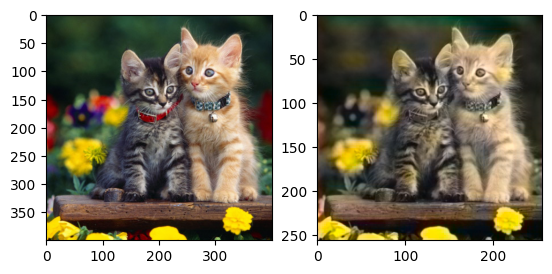

In [26]:
output = model.predict(X)
output *= 128

#output colorizations

min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:, :, 0] = np.clip(X[0][:, :, 0], 0, 100)
cur[:, :, 1:] = ab

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))

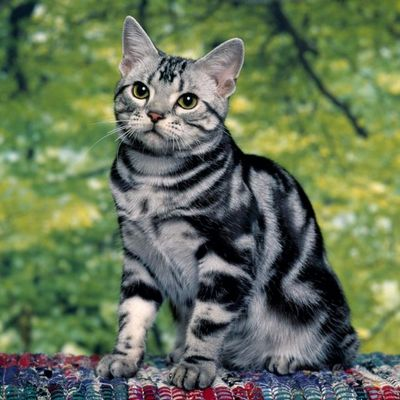

In [29]:
img_3 = Image.open('cats400_2.jpg')
img_3

In [30]:
X, Y, size = processed_image(img_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/tmp/ipykernel_17307/887373033.py:16: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 57 negative Z values that have been clipped to zero
  plt.imshow(lab2rgb(cur))


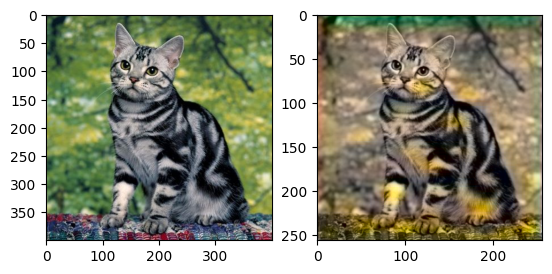

In [32]:
output = model.predict(X)
output *= 128

#output colorizations

min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:, :, 0] = np.clip(X[0][:, :, 0], 0, 100)
cur[:, :, 1:] = ab

plt.subplot(1, 2, 1)
plt.imshow(img_3)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))